### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels

In [2]:
from statsmodels.tsa import ar_model

In [3]:
from sklearn.metrics import mean_squared_error

### Read "yahoo_stock.csv" and set it to dataframe variable

In [4]:
df=pd.read_csv('yahoo_stock.csv')

### View the top 5 rows

In [5]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


### View info of the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1825 non-null   object 
 1   High       1825 non-null   float64
 2   Low        1825 non-null   float64
 3   Open       1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Volume     1825 non-null   float64
 6   Adj Close  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 99.9+ KB


### View the basic statistical information about the data

In [7]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1825.000000
mean,2660.718673,2632.817580,2647.704751,2647.856284,3.869627e+09,2647.856284
std,409.680853,404.310068,407.169994,407.301177,1.087593e+09,407.301177
min,1847.000000,1810.099976,1833.400024,1829.079956,1.296540e+09,1829.079956
25%,2348.350098,2322.250000,2341.979980,2328.949951,3.257950e+09,2328.949951
50%,2696.250000,2667.840088,2685.489990,2683.340088,3.609740e+09,2683.340088
75%,2930.790039,2900.709961,2913.860107,2917.520020,4.142850e+09,2917.520020
max,3645.989990,3600.159912,3612.090088,3626.909912,9.044690e+09,3626.909912


### Check for null values

In [8]:
df.isna().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

### Change datatype of 'Timestamp' column to datetime format

In [9]:
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


### Create a new column called months by fetching month data from Timestamp

In [10]:
df['Month']= pd.DatetimeIndex(df['Date']).month
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Month
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088,11
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893,11
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,11
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,11
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107,11


### Create a new column called Year by fetching year from Timestamp

In [11]:
df['Year']= pd.DatetimeIndex(df['Date']).year
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Month,Year
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088,11,2015
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893,11,2015
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,11,2015
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,11,2015
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107,11,2015


### Create an new column called Date by fetching day from Timestamp

In [12]:
df['Date']= pd.DatetimeIndex(df['Date']).day
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Month,Year
0,23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088,11,2015
1,24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893,11,2015
2,25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,11,2015
3,26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,11,2015
4,27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107,11,2015


### Delete the columns 'Date'

In [13]:
df.drop(columns='Date',inplace=True)
df.head()

,High,Low,Open,Close,Volume,Adj Close,Month,Year
0,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088,11,2015
1,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893,11,2015
2,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,11,2015
3,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,11,2015
4,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107,11,2015


### Create a jointplot of Open vs Close

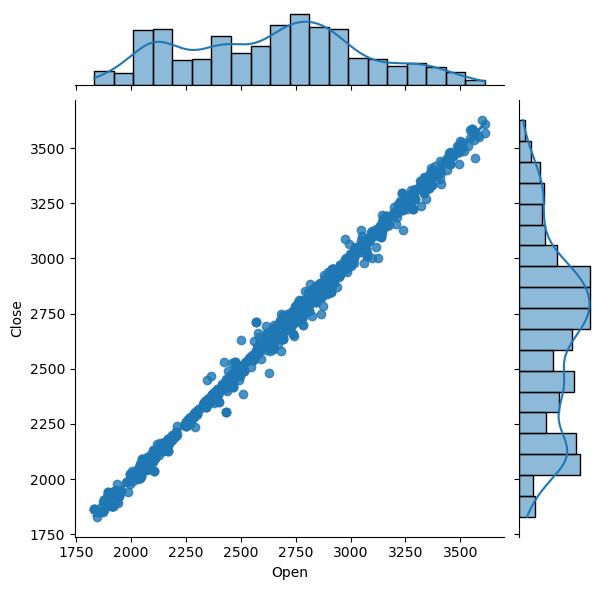

In [14]:
sns.jointplot(x=df['Open'],y=df['Close'],kind='reg')

### Create a jointplot showing the kde distributions of Highest and Lowest Prices of stock price

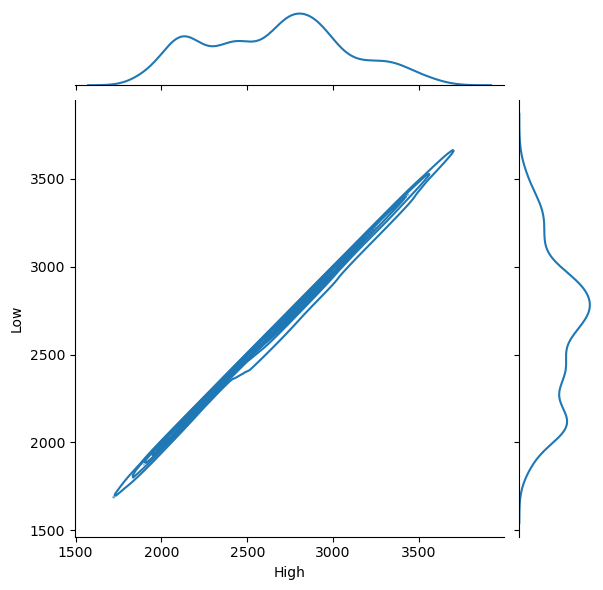

In [15]:
sns.jointplot(x=df['High'],y=df['Low'],kind='kde')

### Create a countplot to show the volume of shareholders

<Axes: xlabel='Volume', ylabel='count'>

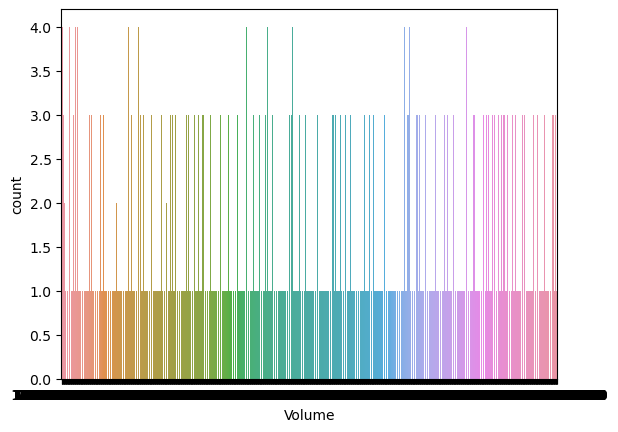

In [16]:
sns.countplot(x=df['Volume'])

### Create a heatmap to visualize the correlation between columns

<Axes: >

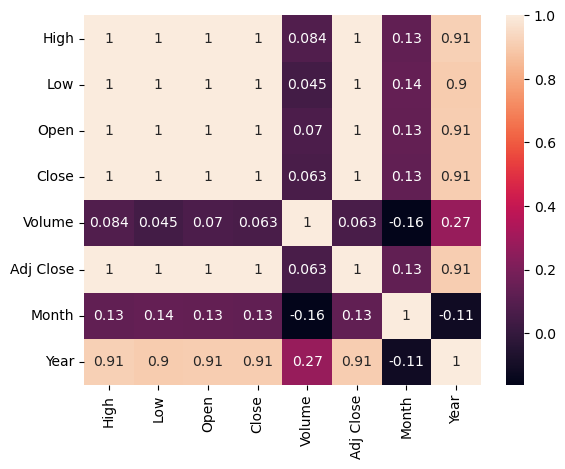

In [17]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

### Split the data into features and target variables (X and y)

In [18]:
X=df.drop(columns='Volume')
y=df['Volume']

### Standardize the data

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()


In [21]:
x_scaled=scaler.fit_transform(X)

In [22]:
pd.DataFrame(x_scaled,columns=X.columns)

,High,Low,Open,Close,Adj Close,Month,Year
0,-1.379765,-1.364247,-1.371535,-1.378390,-1.378390,1.30045,-1.997350
1,-1.383403,-1.391708,-1.383794,-1.372128,-1.372128,1.30045,-1.997350
2,-1.386138,-1.352099,-1.371805,-1.372791,-1.372791,1.30045,-1.997350
3,-1.386138,-1.352099,-1.371805,-1.372791,-1.372791,1.30045,-1.997350
4,-1.385430,-1.357468,-1.372984,-1.369746,-1.369746,1.30045,-1.997350
...,...,...,...,...,...,...,...
1820,2.362953,2.393231,2.339849,2.404417,2.404417,1.30045,1.457126
1821,2.349769,2.364829,2.364784,2.361735,2.361735,1.30045,1.457126
1822,2.339953,2.312009,2.369157,2.259227,2.259227,1.30045,1.457126
1823,2.257256,2.253894,2.239740,2.293806,2.293806,1.30045,1.457126


### Split the data into training and testing set

In [23]:
train_data = y[:int(0.7 * len(df))]
test_data = y[int(0.7 * len(df)):]

### Create a Auto Regression  model and train it

In [24]:
from statsmodels.tsa.ar_model import AutoReg

In [25]:
model = AutoReg(train_data, lags=5)

In [26]:
model_fit = model.fit()

### Summary of the model

In [27]:
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                 Volume   No. Observations:                 1277
Model:                     AutoReg(5)   Log Likelihood              -27268.143
Method:               Conditional MLE   S.D. of innovations      494116049.608
Date:                Sat, 08 Jun 2024   AIC                          54550.286
Time:                        19:48:11   BIC                          54586.325
Sample:                             5   HQIC                         54563.823
                                 1277                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.887e+08   8.05e+07      9.797      0.000    6.31e+08    9.47e+08
Volume.L1      0.8086      0.028     28.937      0.000       0.754       0.863
Volume.L2      0.0396      0.036      1.108      0.2

### Predicting the volume values for the test period using the fitted autoregressive (AR) model and printing the forecasted values.

In [28]:
forecast = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
print(forecast)

1277    3.282056e+09
1278    3.374090e+09
1279    3.447879e+09
1280    3.485860e+09
1281    3.511625e+09
            ...     
1820    3.654717e+09
1821    3.654717e+09
1822    3.654717e+09
1823    3.654717e+09
1824    3.654717e+09
Length: 548, dtype: float64


### Plotting the actual volume values against the forecasted values using an autoregressive (AR) model.

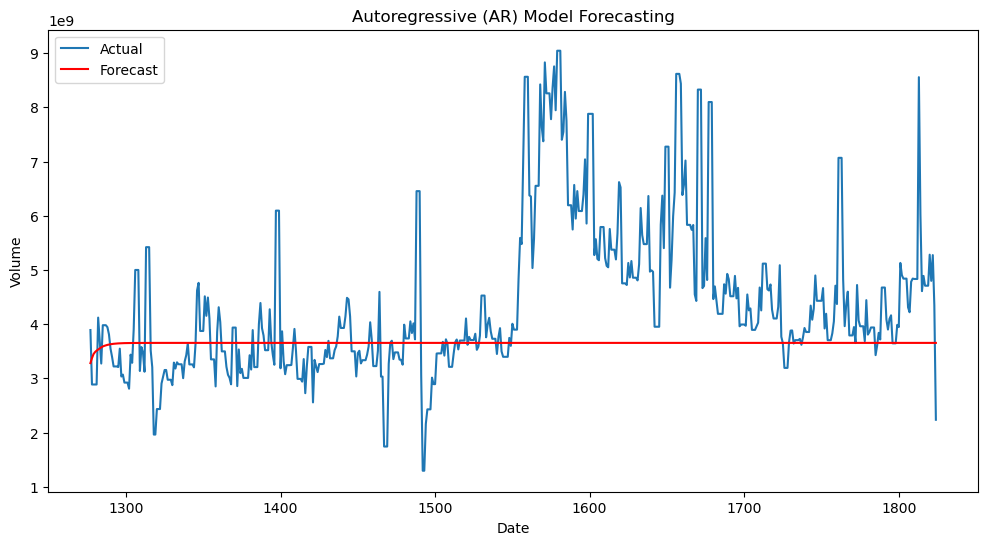

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data.values, label='Actual')
plt.plot(test_data.index, forecast, color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Autoregressive (AR) Model Forecasting')
plt.legend()
plt.show()

### Calculate the MSE

In [30]:
mse = mean_squared_error(test_data, forecast)
print('Mean Squared Error (MSE):', mse)

Mean Squared Error (MSE): 2.6180729780349947e+18
